In [1]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import font_manager, rc

In [2]:
font_path = "C:/Windows/Fonts/malgun.ttf"  # 예시: Windows에서 맑은 고딕 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [4]:
def crawl_kyobobook(keyword):
    driver = webdriver.Chrome()
    url = f'https://search.kyobobook.co.kr/search?keyword={keyword}&gbCode=TOT&target=total'
    driver.get(url)
    time.sleep(2)

    # 스크롤하여 페이지 로드
    for _ in range(20):
        driver.execute_script("window.scrollBy(0, window.innerHeight);")
        time.sleep(1)
    
    books = []
    
    # 책 요소들을 포함하는 메인 컨테이너의 CSS 선택자
    # book_elements = driver.find_elements(By.XPATH, '/html/body/div[3]/main/section/div/div/div[4]/div[2]/div/div[2]/div[3]/ul')

    for i in range(1, 21):
        try:
            title_xpath = f'/html/body/div[3]/main/section/div/div/div[4]/div[2]/div/div[2]/div[3]/ul/li[{i}]/div[1]/div[2]/div[2]/div[1]/div/a'
            price_span_2_xpath = f'/html/body/div[3]/main/section/div/div/div[4]/div[2]/div/div[2]/div[3]/ul/li[{i}]/div[1]/div[2]/div[5]/span[2]'
            price_span_3_xpath = f'/html/body/div[3]/main/section/div/div/div[4]/div[2]/div/div[2]/div[3]/ul/li[{i}]/div[1]/div[2]/div[5]/span[3]'
            image_xpath = f'/html/body/div[3]/main/section/div/div/div[4]/div[2]/div/div[2]/div[3]/ul/li[{i}]/div[1]/div[1]/a/span/img'
            
            # 제목과 가격 및 이미지의 CSS 선택자
            title_element = driver.find_element(By.XPATH, title_xpath)
            price_span_2_element = driver.find_element(By.XPATH, price_span_2_xpath)
            image_element = driver.find_element(By.XPATH, image_xpath)

            # 가격 선택 로직
            if "소장" in price_span_2_element.text:
                price_element = driver.find_element(By.XPATH, price_span_3_xpath)
            else:
                price_element = price_span_2_element

            title = title_element.text
            price = price_element.text
            image_url = image_element.get_attribute('src')

            books.append({'Title': title, 'Price': price, 'Image_URL': image_url})
        except Exception as e:
            print(f"Error occurred: {e}")

    driver.quit()
    print(books)

    # 결과를 엑셀 파일로 저장
    df = pd.DataFrame(books)
    df.to_excel(f'{keyword}_books.xlsx', index=False)

    # 데이터 시각화
    visualize_data(f'{keyword}_books.xlsx')

In [7]:
def visualize_data(filename):
    # 엑셀 파일 불러오기
    df = pd.read_excel(filename)
    
    # 가격 데이터를 숫자로 변환 (예: '12,000원' -> 12000)
    df['Price'] = df['Price'].replace('[^0-9]', '', regex=True)
    
    # 결측치가 있는 경우 처리
    df = df[df['Price'] != '']  # 빈 값 제거
    df['Price'] = df['Price'].astype(int)
    
    # 가격 분포를 히스토그램으로 시각화
    plt.figure(figsize=(10, 6))
    plt.barh(df['Title'], df['Price'], color='skyblue')
    plt.xlabel('Price')
    plt.ylabel('Title')
    plt.title('Book Prices on Kyobo Bookstore')
    plt.tight_layout()
    plt.show()

[{'Title': '[국내도서] 만들면서 배우는 파이썬과 40개의 작품들', 'Price': '16,920 원 ', 'Image_URL': 'https://contents.kyobobook.co.kr/sih/fit-in/200x0/pdt/9791185553931.jpg'}, {'Title': '[국내도서] 파이썬을 이용한 퀀트 투자 포트폴리오 만들기', 'Price': '27,000 원 ', 'Image_URL': 'https://contents.kyobobook.co.kr/sih/fit-in/200x0/pdt/9791192469829.jpg'}, {'Title': '[국내도서] 커리어 스킬업 파이썬 업무 자동화', 'Price': '23,400 원 ', 'Image_URL': 'https://contents.kyobobook.co.kr/sih/fit-in/200x0/pdt/9791140713899.jpg'}, {'Title': '[eBook] 커리어 스킬업 파이썬 업무 자동화', 'Price': '18,720 원', 'Image_URL': 'https://contents.kyobobook.co.kr/sih/fit-in/200x0/pdt/480D240724210.jpg'}, {'Title': '[국내도서] R을 이용한 퀀트 투자 포트폴리오 만들기', 'Price': '22,500 원 ', 'Image_URL': 'https://contents.kyobobook.co.kr/sih/fit-in/200x0/pdt/9791190665803.jpg'}, {'Title': '[국내도서] 파이썬을 이용한 웹크롤링과 데이터 분석', 'Price': '|', 'Image_URL': 'https://contents.kyobobook.co.kr/sih/fit-in/200x0/pdt/9791185578910.jpg'}, {'Title': '[국내도서] 당신의 칼퇴를 도와주는 UiPath 업무 자동화', 'Price': '25,200 원 ', 'Image_URL': 'https:/

C:\Users\jjm98\AppData\Local\Temp\ipykernel_17360\2424957913.py:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


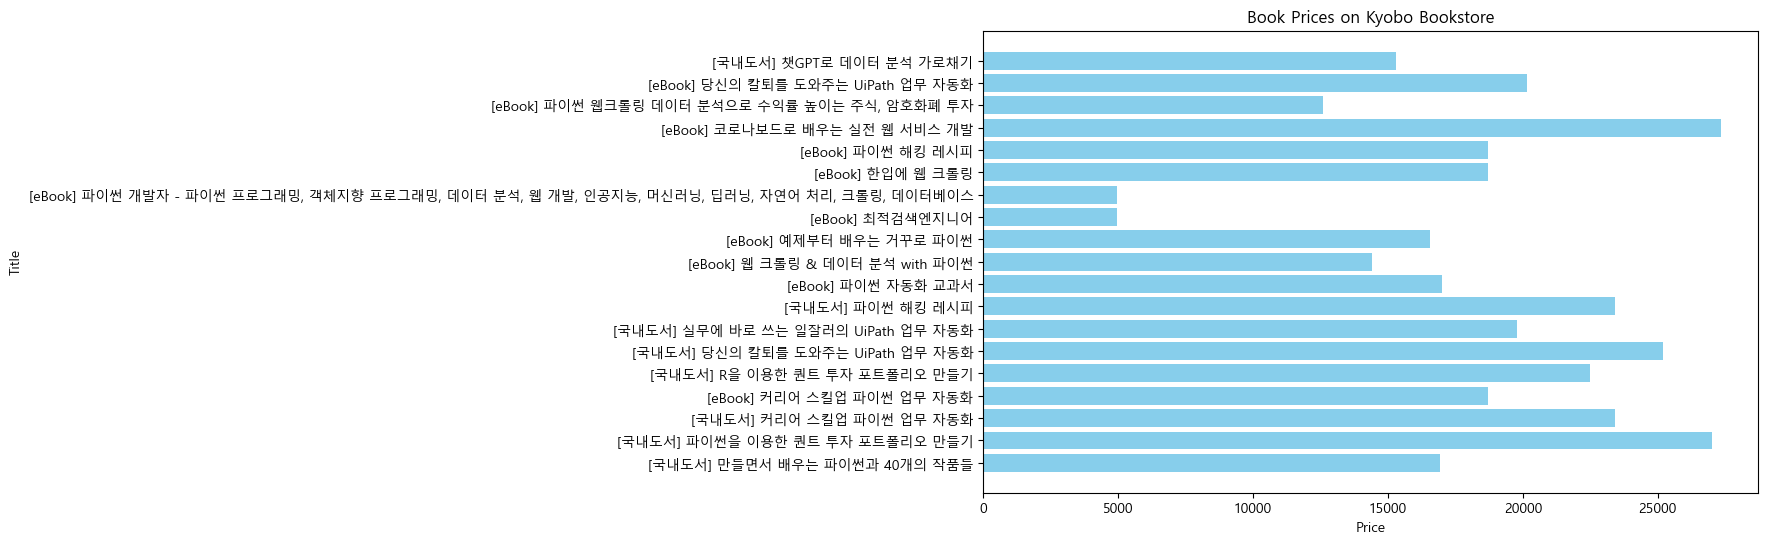

In [8]:
# 엑셀 파일 이름
filename = '크롤링_books.xlsx'

# 함수 실행
crawl_kyobobook('크롤링')